#  **Iris Flowers type prediction Model**

1.**Data Loading and Exploration:**
Purpose: This section is responsible for loading the dataset and performing initial exploratory data
analysis (EDA).
Explanation:
- The Iris dataset is loaded from a CSV file stored in Google Drive (specific to the Colab
environment).
- head(): Displays the first 10 rows to give an idea of the data structure.
- dtypes: Shows the data types of each column, helping to identify categorical and numerical
variables.
- describe(): Generates summary statistics, such as mean, min, and max, for each numerical
column, providing insight into data distribution.
- ID column removal: The 'Id' column is dropped because it has no predictive value.
- Missing Values: Checked using isnull().sum(), confirming no missing or null values in the dataset.
Conclusion: The dataset is clean, with no missing values and equal distribution among species,
ready for further processing

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
Iris=pd.read_csv('/content/drive/MyDrive/Iris.csv')

In [4]:
Iris.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [5]:
Iris.dtypes

,0
Id,int64
SepalLengthCm,float64
SepalWidthCm,float64
PetalLengthCm,float64
PetalWidthCm,float64
Species,object


In [6]:
Iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
#Let's drop the column ID beacuse it has now any key roll it is just counting
Iris=Iris.drop(columns=['Id'])

In [8]:
Iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
Iris.isnull().sum()

,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


The data set has no missing or null values.

2. **Data Visualization:**
Purpose: Visualizing the data distribution and relationships between features to understand the
underlying patterns.
Explanation:
- Boxplot: Visualizes the distribution of features and helps in detecting any outliers.
- Countplot: Displays the count of each species in the dataset, confirming equal distribution.
- Scatterplot: A scatter plot of petal length vs. petal width, colored by species, is created. This allows
us to see clear separations between species based on these two features.
Conclusion: Visualization provides valuable insights into how different features (especially petal
length and width) separate different species, setting the stage for modeling

<Axes: >

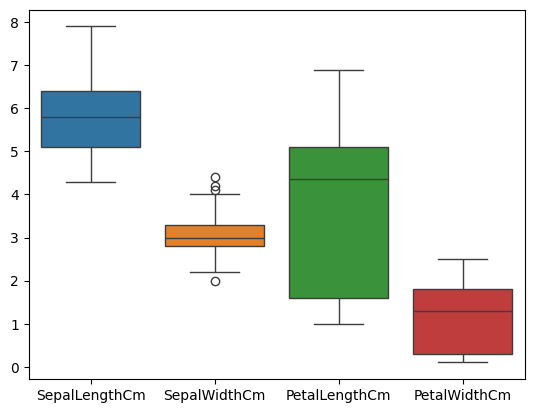

In [10]:
sns.boxplot(Iris)

<ipython-input-11-4afdbc21e48a>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Species', data=Iris, palette='Set2')


<Axes: xlabel='Species', ylabel='count'>

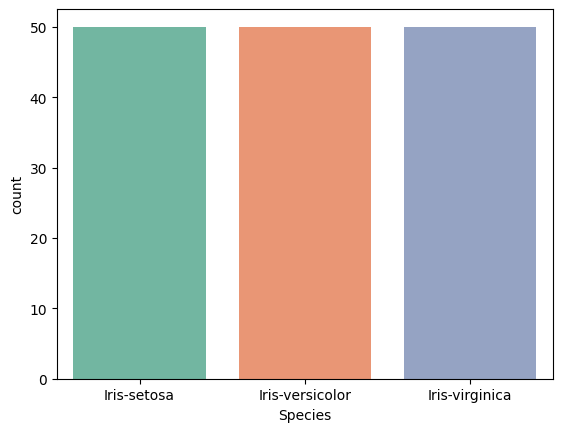

In [11]:
sns.countplot(x='Species', data=Iris, palette='Set2')

In [12]:
Iris['Species'].value_counts()

,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


This means we have equaly distributed data point.

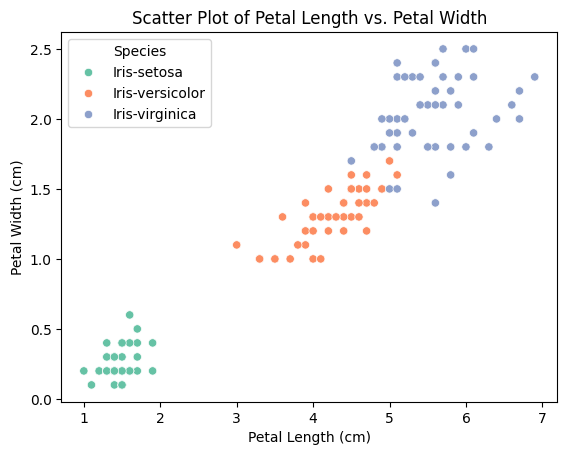

In [13]:
sns.scatterplot(x='PetalLengthCm', y='PetalWidthCm', hue='Species', data=Iris, palette='Set2')


# Add labels and title
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Scatter Plot of Petal Length vs. Petal Width')

# Show the plot
plt.show()

In [14]:
Iris1=Iris.drop(['Species'], axis=1).corr()

<Axes: >

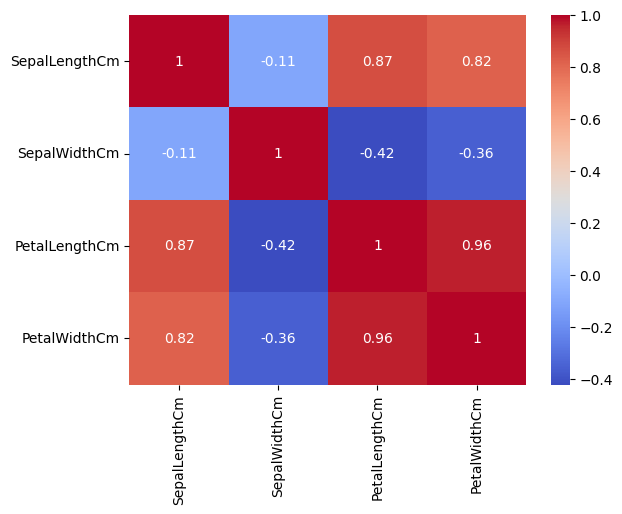

In [15]:
sns.heatmap(Iris1, annot=True, cmap='coolwarm')

In [16]:
Iris1.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.941225,0.975716,0.963204
SepalWidthCm,-0.941225,1.000000,-0.992071,-0.994744
PetalLengthCm,0.975716,-0.992071,1.000000,0.997991
PetalWidthCm,0.963204,-0.994744,0.997991,1.000000


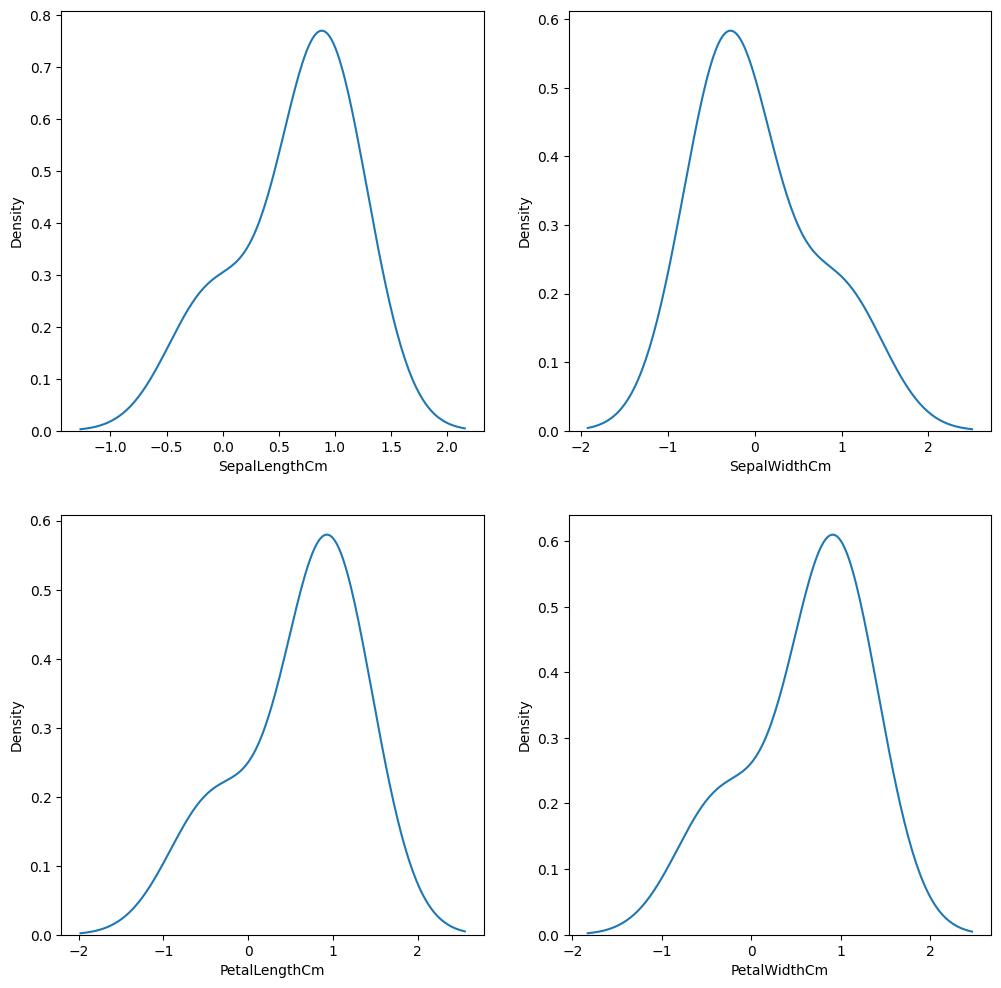

In [17]:
plt.figure(figsize=(12,12))
i=1
for col in Iris1.columns:
    plt.subplot(2,2,i)
    sns.kdeplot(Iris1[col])
    i+=1


In [18]:
Iris_copy=Iris.copy()

**3. Feature Engineering and Label Encoding:**

Purpose: Prepares the dataset for modeling by transforming categorical features into numerical
representations.
Explanation:
- Label Encoding: The categorical target variable 'Species' is encoded into numeric form using
LabelEncoder. This is necessary because machine learning algorithms require numeric inputs.
- Feature Separation: The dataset is divided into feature set X (all columns except 'Species') and
target variable y (encoded 'Species').
Conclusion: The dataset is now ready for machine learning algorithms, with properly encoded
categorical labels and a clear separation between features and target.


In [19]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
Iris_copy['coded_Species']=label_encoder.fit_transform(Iris_copy['Species'])
Iris_copy.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,coded_Species
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0
5,5.4,3.9,1.7,0.4,Iris-setosa,0
6,4.6,3.4,1.4,0.3,Iris-setosa,0
7,5.0,3.4,1.5,0.2,Iris-setosa,0
8,4.4,2.9,1.4,0.2,Iris-setosa,0
9,4.9,3.1,1.5,0.1,Iris-setosa,0


In [20]:
Iris_copy.drop(['Species'], axis=1, inplace=True)


In [21]:
Iris_copy

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,coded_Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [22]:
y=Iris_copy['coded_Species']
y

,coded_Species
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [23]:
Iris_copy.drop(['coded_Species'], axis=1, inplace=True)

In [24]:
x=Iris_copy
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [25]:
print(x)
print(y)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0              5.1           3.5            1.4           0.2
1              4.9           3.0            1.4           0.2
2              4.7           3.2            1.3           0.2
3              4.6           3.1            1.5           0.2
4              5.0           3.6            1.4           0.2
..             ...           ...            ...           ...
145            6.7           3.0            5.2           2.3
146            6.3           2.5            5.0           1.9
147            6.5           3.0            5.2           2.0
148            6.2           3.4            5.4           2.3
149            5.9           3.0            5.1           1.8

[150 rows x 4 columns]
0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: coded_Species, Length: 150, dtype: int64


4. **Model Training:**

Purpose: Training a logistic regression model to classify the iris species based on feature data.
Explanation:
- Data Splitting: The dataset is split into training (80%) and test (20%) sets using train_test_split().
- Feature Scaling: Features are standardized using StandardScaler() to ensure that all input features
contribute equally to the model.
- Logistic Regression: A basic logistic regression model is initialized.
- Hyperparameter Tuning: RandomizedSearchCV is used to search for the best hyperparameters
(penalty and regularization strength) for logistic regression. The C parameter controls the
regularization, and penalties 'l1' and 'l2' are tested with the 'liblinear' solver.
Conclusion: The logistic regression model is trained with optimized hyperparameters, enhancing its
predictive performance.

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import precision_score

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [28]:
x_train

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
4,5.0,3.6,1.4,0.2
32,5.2,4.1,1.5,0.1
142,5.8,2.7,5.1,1.9
85,6.0,3.4,4.5,1.6
86,6.7,3.1,4.7,1.5
...,...,...,...,...
71,6.1,2.8,4.0,1.3
106,4.9,2.5,4.5,1.7
14,5.8,4.0,1.2,0.2
92,5.8,2.6,4.0,1.2


In [29]:
y_train.head(15)

,coded_Species
4,0
32,0
142,2
85,1
86,1
16,0
10,0
81,1
133,2
137,2


In [30]:
# Scale the data using StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [31]:
param_dist = {
	'C': np.logspace(-4, 4, 100), # Range of C values in logarithmic scale
	'penalty': ['l2'], # Only 'l2' penalty is compatible with 'lbfgs' solver
	'solver': ['lbfgs'] # Use only 'lbfgs' solver
}

In [32]:
logistic_regression = LogisticRegression(max_iter=1000)

In [33]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score

4. **Model Training:**

Purpose: Training a logistic regression model to classify the iris species based on feature data.
Explanation:
- Data Splitting: The dataset is split into training (80%) and test (20%) sets using train_test_split().
- Feature Scaling: Features are standardized using StandardScaler() to ensure that all input features
contribute equally to the model.
- Logistic Regression: A basic logistic regression model is initialized.
- Hyperparameter Tuning: RandomizedSearchCV is used to search for the best hyperparameters
(penalty and regularization strength) for logistic regression. The C parameter controls the
regularization, and penalties 'l1' and 'l2' are tested with the 'liblinear' solver.
Conclusion: The logistic regression model is trained with optimized hyperparameters, enhancing its
predictive performance.

In [34]:
random_search = RandomizedSearchCV(logistic_regression, param_distributions=param_dist, n_iter=100, cv=5, scoring='accuracy', random_state=42, error_score='raise')
random_search.fit(x_train_scaled, y_train)

RandomizedSearchCV(cv=5, error_score='raise',
                   estimator=LogisticRegression(max_iter=1000), n_iter=100,
                   param_distributions={'C': array([1.00000000e-04, 1.20450354e-04, 1.45082878e-04, 1.74752840e-04,
       2.10490414e-04, 2.53536449e-04, 3.05385551e-04, 3.67837977e-04,
       4.43062146e-04, 5.33669923e-04, 6.42807312e-04, 7.74263683e-04,
       9.32603347e-04, 1.12332403e-03, 1.3530477...
       2.91505306e+02, 3.51119173e+02, 4.22924287e+02, 5.09413801e+02,
       6.13590727e+02, 7.39072203e+02, 8.90215085e+02, 1.07226722e+03,
       1.29154967e+03, 1.55567614e+03, 1.87381742e+03, 2.25701972e+03,
       2.71858824e+03, 3.27454916e+03, 3.94420606e+03, 4.75081016e+03,
       5.72236766e+03, 6.89261210e+03, 8.30217568e+03, 1.00000000e+04]),
                                        'penalty': ['l2'],
                                        'solver': ['lbfgs']},
                   random_state=42, scoring='accuracy')

In [35]:
best_params = random_search.best_params_
# Fit the model with the best hyperparameters on the entire dataset
model1 = random_search.best_estimator_
model1.fit(x_train_scaled, y_train)


LogisticRegression(C=0.7564633275546291, max_iter=1000)

In [36]:
y_pred=model1.predict(x_test_scaled)

5. **Model Evaluation on Test Data:**

Purpose: Evaluate the performance of the trained model on the unseen test data.
Explanation:
- Confusion Matrix: A confusion matrix is created to visualize the number of correct and incorrect
predictions.
- Accuracy: Calculated using accuracy_score(), which gives an overall sense of how well the model
is classifying the test data.
- Precision: precision_score() measures how many of the predicted species are correct, weighted by
the class distribution.
- Classification Report: Generates additional metrics like precision, recall, and F1-score for each
species class.
Conclusion: The model's performance is quantified with accuracy, precision, and other metrics.
These metrics provide insight into how well the model generalizes to new data.
6. Confusion Matrix and Visualization:
Purpose: To visually interpret the model's classification results.
Explanation:
- Confusion Matrix: Displays the breakdown of predictions across true and predicted classes, with
true positives, false positives, etc.
- Heatmap: A heatmap is used to visualize the confusion matrix, which is especially useful for
identifying where the model might be making mistakes (e.g., misclassifying certain species).
Conclusion: The heatmap provides a clear understanding of the model's predictive strengths and
weaknesses

In [37]:
cm=confusion_matrix(y_test, y_pred)
print(cm)
accuracy=accuracy_score(y_test, y_pred)

print(f"Best Hyperparameters: {best_params}")
print(f"Accuracy on test set: {accuracy:.3f}")

[[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]
Best Hyperparameters: {'solver': 'lbfgs', 'penalty': 'l2', 'C': 0.7564633275546291}
Accuracy on test set: 1.000


In [38]:
# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')

print("Precision:", precision)

Precision: 1.0


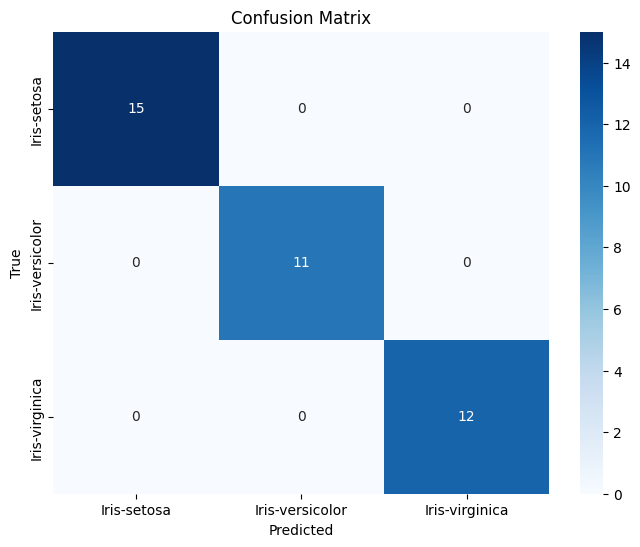

In [39]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [40]:
# Calculate the classification report
report = classification_report(y_test, y_pred)

print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



8.** Error Analysis and Model Diagnostics:**

Purpose: Understanding the model's shortcomings by analyzing the errors it makes.
Explanation:
- MAE (Mean Absolute Error): Measures the average magnitude of the errors in a set of predictions,
without considering their direction.
- MSE (Mean Squared Error): A more sensitive metric to large errors, it squares the errors before
averaging.
- R2 Score: Indicates how well the model's predictions approximate the real data.
Conclusion: These evaluation metrics help diagnose the model's predictive power and highlight
where it may need improvement, especially if errors are high or if R2 is low

In [41]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [42]:
print("-----Model Evaluation on Test Data-----")
print("MAE:",mean_absolute_error(y_test, y_pred))
print("MSE:",mean_squared_error(y_test, y_pred))
print("R2_score:",r2_score(y_test, y_pred))

-----Model Evaluation on Test Data-----
MAE: 0.0
MSE: 0.0
R2_score: 1.0


In [43]:
y_pred_train=model1.predict(x_train_scaled)

In [44]:
cm=confusion_matrix(y_train, y_pred_train)
print(cm)
accuracy=accuracy_score(y_train, y_pred_train)

print(f"Best Hyperparameters: {best_params}")
print(f"Accuracy on test set: {accuracy:.3f}")

[[35  0  0]
 [ 0 36  3]
 [ 0  1 37]]
Best Hyperparameters: {'solver': 'lbfgs', 'penalty': 'l2', 'C': 0.7564633275546291}
Accuracy on test set: 0.964


In [45]:
print("-----Model Evaluation on Train Data-----")
print("MAE:",mean_absolute_error(y_train, y_pred_train))
print("MSE:",mean_squared_error(y_train, y_pred_train))
print("R2_score:",r2_score(y_train, y_pred_train))

-----Model Evaluation on Train Data-----
MAE: 0.03571428571428571
MSE: 0.03571428571428571
R2_score: 0.9451450961185258
